<a href="https://colab.research.google.com/github/Amrutha-GR/AGR/blob/main/Linear_Regression_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

Load Data

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Real_Estate_df = pd.read_csv('/content/drive/MyDrive/Data_Science/DATA/RealEstateData.csv')

Viewing the head and tail of data

In [ ]:
Real_Estate_df.head()

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
0,0.00632,2.31,4.0,65.0,4.0900,4.98,24.000000
1,0.02731,7.07,4.0,78.0,4.9671,9.14,21.600000
2,0.02729,7.07,5.0,61.0,4.9671,4.03,34.700001
3,0.03237,2.18,4.0,45.0,6.0622,2.94,33.400002
4,0.06905,2.18,5.0,54.0,6.0622,5.33,36.200001


In [ ]:
Real_Estate_df.tail()

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
495,0.06263,11.93,4.0,69.0,2.4786,9.67,22.4
496,0.04527,11.93,4.0,76.0,2.2875,9.08,20.6
497,0.06076,11.93,4.0,91.0,2.1675,5.64,23.9
498,0.10959,11.93,4.0,89.0,2.3889,6.48,22.0
499,0.04741,11.93,4.0,80.0,2.5050,7.88,11.9


Observation, Attributes and Data shape

In [ ]:
type(Real_Estate_df)

pandas.core.frame.DataFrame

In [ ]:
len(Real_Estate_df)

500

In [ ]:
Real_Estate_df.shape

(500, 7)

In [ ]:
Real_Estate_df.size

3500

In [ ]:
Real_Estate_df.ndim

2

Structure of data

In [ ]:
Real_Estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Crime.Rate.in.the.Area                        493 non-null    float64
 1   Ratio.of.Commercial...Residential.Properties  496 non-null    float64
 2   Number.of.Rooms                               496 non-null    float64
 3   Age.of.Property                               497 non-null    float64
 4   Distance...Nearest.Emp.hub                    496 non-null    float64
 5   Ratio.of.Lower.Income.people.in.area          494 non-null    float64
 6   Sale.Price.of.House                           500 non-null    float64
dtypes: float64(7)
memory usage: 27.5 KB


Summary Statistics

In [ ]:
Real_Estate_df.describe()

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
count,493.000000,496.000000,496.000000,497.000000,496.000000,494.000000,500.000000
mean,3.655323,11.124819,3.780242,68.156942,3.785060,12.648178,22.564400
std,8.695102,6.862173,0.782442,28.236678,2.104649,7.117030,9.236213
min,0.006320,0.460000,1.000000,2.000000,1.129600,1.730000,5.000000
25%,0.081990,5.190000,3.000000,44.000000,2.097050,6.950000,17.075000
50%,0.261690,9.690000,4.000000,77.000000,3.190950,11.430000,21.200001
75%,3.678220,18.100000,4.000000,94.000000,5.118000,16.954999,25.000000
max,88.976196,27.740000,6.000000,100.000000,12.126500,37.970001,50.000000


Calculate average age of property

In [ ]:
Real_Estate_df['Age.of.Property'].mean()

68.1569416498994

Missing Value treatment 

In [ ]:
Real_Estate_df.isnull().sum()

Crime.Rate.in.the.Area                          7
Ratio.of.Commercial...Residential.Properties    4
Number.of.Rooms                                 4
Age.of.Property                                 3
Distance...Nearest.Emp.hub                      4
Ratio.of.Lower.Income.people.in.area            6
Sale.Price.of.House                             0
dtype: int64

In [ ]:
Real_Estate_df = Real_Estate_df.fillna(Real_Estate_df.mean())

In [ ]:
Real_Estate_df.isnull().sum()

Crime.Rate.in.the.Area                          0
Ratio.of.Commercial...Residential.Properties    0
Number.of.Rooms                                 0
Age.of.Property                                 0
Distance...Nearest.Emp.hub                      0
Ratio.of.Lower.Income.people.in.area            0
Sale.Price.of.House                             0
dtype: int64

Exploratory Data Analysis

Would more commercial property in the area make the house more expensive

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

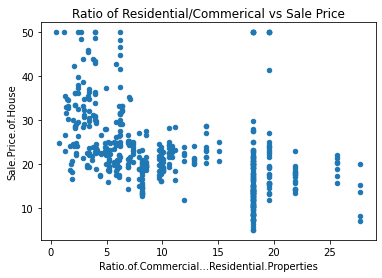

In [ ]:
Real_Estate_df.plot(kind = 'scatter', x = 'Ratio.of.Commercial...Residential.Properties', y = 'Sale.Price.of.House' , title = "Ratio of Residential/Commerical vs Sale Price")

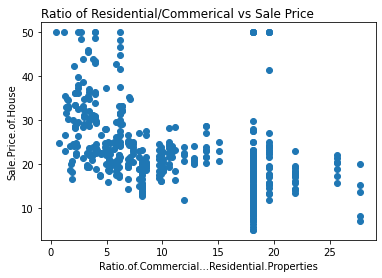

In [ ]:
plt.scatter(Real_Estate_df['Ratio.of.Commercial...Residential.Properties'], Real_Estate_df['Sale.Price.of.House'])
plt.title('Ratio of Residential/Commerical vs Sale Price' , loc ='left')
plt.xlabel('Ratio.of.Commercial...Residential.Properties')
plt.ylabel('Sale.Price.of.House')
plt.show()

In [ ]:
Real_Estate_df['Ratio.of.Commercial...Residential.Properties'].cov(Real_Estate_df['Sale.Price.of.House'])

-30.531507065872265

In [ ]:
Real_Estate_df['Ratio.of.Commercial...Residential.Properties'].corr(Real_Estate_df['Sale.Price.of.House'])

-0.48366012878994497

Would less lower income people in the area make the house more costly

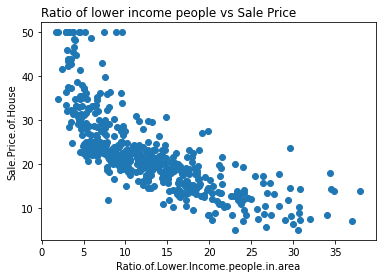

In [ ]:
plt.scatter(Real_Estate_df['Ratio.of.Lower.Income.people.in.area'], Real_Estate_df['Sale.Price.of.House'])
plt.title('Ratio of lower income people vs Sale Price' , loc ='left')
plt.xlabel('Ratio.of.Lower.Income.people.in.area')
plt.ylabel('Sale.Price.of.House')
plt.show()

In [ ]:
Real_Estate_df['Ratio.of.Lower.Income.people.in.area'].cov(Real_Estate_df['Sale.Price.of.House'])

-48.316185263164684

In [ ]:
Real_Estate_df['Ratio.of.Lower.Income.people.in.area'].corr(Real_Estate_df['Sale.Price.of.House'])

-0.7394804684248601

Relation between Crime rate in the area and Sales price of house

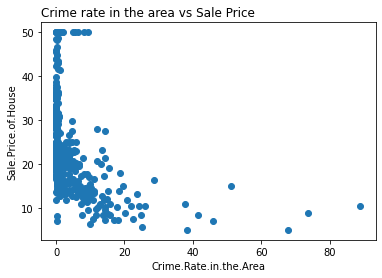

In [ ]:
plt.scatter(Real_Estate_df['Crime.Rate.in.the.Area'], Real_Estate_df['Sale.Price.of.House'])
plt.title('Crime rate in the area vs Sale Price' , loc ='left')
plt.xlabel('Crime.Rate.in.the.Area')
plt.ylabel('Sale.Price.of.House')
plt.show()

In [ ]:
Real_Estate_df['Crime.Rate.in.the.Area'].cov(Real_Estate_df['Sale.Price.of.House'])

-30.91922300055223

In [ ]:
Real_Estate_df['Crime.Rate.in.the.Area'].corr(Real_Estate_df['Sale.Price.of.House'])

-0.3877284641465176

Relationship and Strength of relationship between Age of property and Price of house

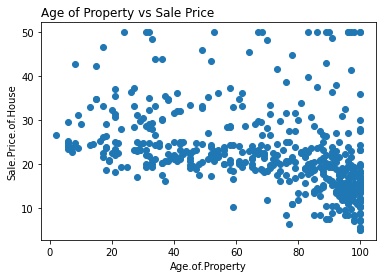

In [ ]:
plt.scatter(Real_Estate_df['Age.of.Property'], Real_Estate_df['Sale.Price.of.House'])
plt.title('Age of Property vs Sale Price' , loc ='left')
plt.xlabel('Age.of.Property')
plt.ylabel('Sale.Price.of.House')
plt.show()

In [ ]:
Real_Estate_df['Age.of.Property'].cov(Real_Estate_df['Sale.Price.of.House'])

-99.28395037722161

In [ ]:
Real_Estate_df['Age.of.Property'].corr(Real_Estate_df['Sale.Price.of.House'])

-0.3818395809234209

Relationship between all the variables and the strength of the relationship between them

In [40]:
covariance = Real_Estate_df.cov()
covariance

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
Crime.Rate.in.the.Area,74.544208,23.682228,-1.404383,84.965516,-6.740306,27.952074,-30.919223
Ratio.of.Commercial...Residential.Properties,23.682228,46.711955,-1.926816,122.698931,-10.031752,29.224539,-30.531507
Number.of.Rooms,-1.404383,-1.926816,0.607307,-4.503689,0.288939,-3.094307,4.482653
Age.of.Property,84.965516,122.698931,-4.503689,792.516550,-43.697344,119.027064,-99.283950
Distance...Nearest.Emp.hub,-6.740306,-10.031752,0.288939,-43.697344,4.394041,-7.355475,4.791190
Ratio.of.Lower.Income.people.in.area,27.952074,29.224539,-3.094307,119.027064,-7.355475,50.043076,-48.316185
Sale.Price.of.House,-30.919223,-30.531507,4.482653,-99.283950,4.791190,-48.316185,85.307628


In [41]:
correlation = Real_Estate_df.corr()
correlation

,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
Crime.Rate.in.the.Area,1.000000,0.401330,-0.208725,0.349568,-0.372427,0.457652,-0.387728
Ratio.of.Commercial...Residential.Properties,0.401330,1.000000,-0.361761,0.637709,-0.700214,0.604452,-0.483660
Number.of.Rooms,-0.208725,-0.361761,1.000000,-0.205286,0.176877,-0.561290,0.622783
Age.of.Property,0.349568,0.637709,-0.205286,1.000000,-0.740489,0.597681,-0.381840
Distance...Nearest.Emp.hub,-0.372427,-0.700214,0.176877,-0.740489,1.000000,-0.496029,0.247467
Ratio.of.Lower.Income.people.in.area,0.457652,0.604452,-0.561290,0.597681,-0.496029,1.000000,-0.739480
Sale.Price.of.House,-0.387728,-0.483660,0.622783,-0.381840,0.247467,-0.739480,1.000000


In [46]:
correlation.style.background_gradient(cmap='coolwarm')


,Crime.Rate.in.the.Area,Ratio.of.Commercial...Residential.Properties,Number.of.Rooms,Age.of.Property,Distance...Nearest.Emp.hub,Ratio.of.Lower.Income.people.in.area,Sale.Price.of.House
Crime.Rate.in.the.Area,1.000000,0.401330,-0.208725,0.349568,-0.372427,0.457652,-0.387728
Ratio.of.Commercial...Residential.Properties,0.401330,1.000000,-0.361761,0.637709,-0.700214,0.604452,-0.483660
Number.of.Rooms,-0.208725,-0.361761,1.000000,-0.205286,0.176877,-0.561290,0.622783
Age.of.Property,0.349568,0.637709,-0.205286,1.000000,-0.740489,0.597681,-0.381840
Distance...Nearest.Emp.hub,-0.372427,-0.700214,0.176877,-0.740489,1.000000,-0.496029,0.247467
Ratio.of.Lower.Income.people.in.area,0.457652,0.604452,-0.561290,0.597681,-0.496029,1.000000,-0.739480
Sale.Price.of.House,-0.387728,-0.483660,0.622783,-0.381840,0.247467,-0.739480,1.000000
